In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mq_glip_sam2_joint_model import MQGLIPSam2JointModel


def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:313: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:378: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/layers/deform_conv.py:428: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` i

In [3]:
mq_glip_sam2_joint_model = MQGLIPSam2JointModel()

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False


/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Some weights of QVBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['encoder.qv_layer.0.attn.norm.bias', 'encoder.qv_layer.0.attn.norm.weight', 'encoder.qv_layer.0.attn.norm_kv.bias', 'encoder.qv_layer.0.attn.norm_kv.weight', 'encoder.qv_layer.0.attn.to_kv.weight', 'encoder.qv_layer.0.attn.to_out.weight', 'encoder.qv_layer.0.attn.to_q.weight', 'encoder.qv_layer.0.attn_gate.linear1.weight', 'encoder.qv_layer.0.attn_gate.linear2.weight', 'encoder.qv_layer.0.attn_gate.norm.bias', 'encoder.qv_layer.0.attn_gate.norm.weight', 'encoder.qv_layer.0.ff.linear1.weight', 'encoder.qv_layer.0.ff.linear2.weight', 'encoder.qv_layer.0.ff.norm.bias', 'encoder.qv_layer.0.ff.norm.weight', 'encoder.qv_layer.0.ff_gate', 'encoder.qv_layer.1.attn.norm.bias', 'encoder.qv_layer.1.attn.norm.weight', 'encoder.qv_layer.1.attn.norm_kv.bias', 'encoder.qv_layer.1.attn.norm_kv.weight', 'encoder.qv_layer.1.attn.to_kv.weight', 'encoder.qv_layer.1.attn.to_out.weight

EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


Some layers unloaded with pre-trained weight: 
rpn.head.cls_logits.{bias, weight}


# data

In [4]:
video_dir = "/home/jielei/sam2/notebooks/videos/bedroom"
prompt_box = np.array([300, 0, 500, 400], dtype=np.float32) # copied from sam2 notebook
text_prompt = "pillow"

In [5]:
frame_idx_to_run_image_grounding = 90
video_frame_paths = mq_glip_sam2_joint_model.get_frame_paths(video_dir)
video_frames = [
    mq_glip_sam2_joint_model.mq_glip_model.load_image(p) 
    for p in video_frame_paths
]
image_for_grounding = video_frames[frame_idx_to_run_image_grounding]

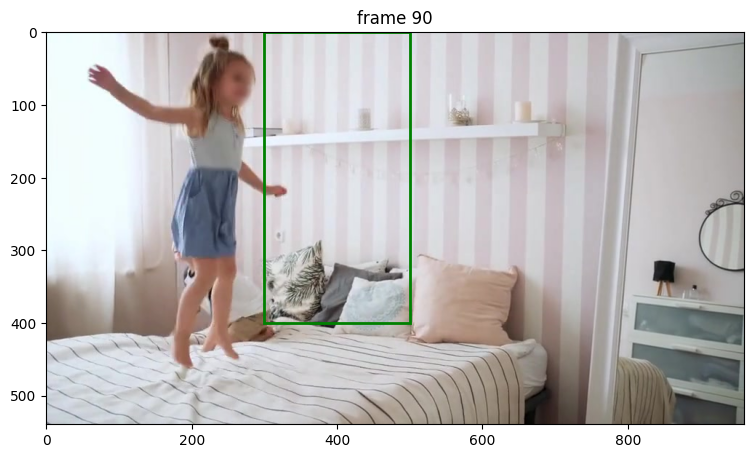

In [6]:
# show the given box
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx_to_run_image_grounding}")
plt.imshow(image_for_grounding)
show_box(prompt_box, plt.gca())

# Run image grounding - text only

In [7]:
grounding_results_text_only = mq_glip_sam2_joint_model.run_image_grounding(
    image_for_grounding, 
    text_prompt=text_prompt, 
    box_prompt=None, 
    box_prompt_mode="xyxy"
)

[[[0, 6]]]


/home/jielei/miniconda/envs/ov_det/lib/python3.10/site-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/hpcaas/.mounts/fs-0df31b178aa4037ac/home/jielei/MQ-Det/maskrcnn_benchmark/modeling/rpn/vldyhead.py:224: UserWarning: `nn.functional.upsample_bilinear` is deprecated. Use `nn.functional.interpolate` instead.
  temp_fea.append(F.upsample_bilinear(self.DyConv[0](visual_feats[level + 1], **conv_args),


In [8]:
grounding_results_text_only

{'bbox': [[231.2789764404297,
   287.7982482910156,
   652.8214721679688,
   433.0870666503906],
  [295.8597412109375, 286.1637268066406, 387.1779479980469, 400.206787109375],
  [497.32696533203125,
   305.9603271484375,
   649.8797607421875,
   431.4630126953125]],
 'scores': [0.623054027557373, 0.525066614151001, 0.5067640542984009]}

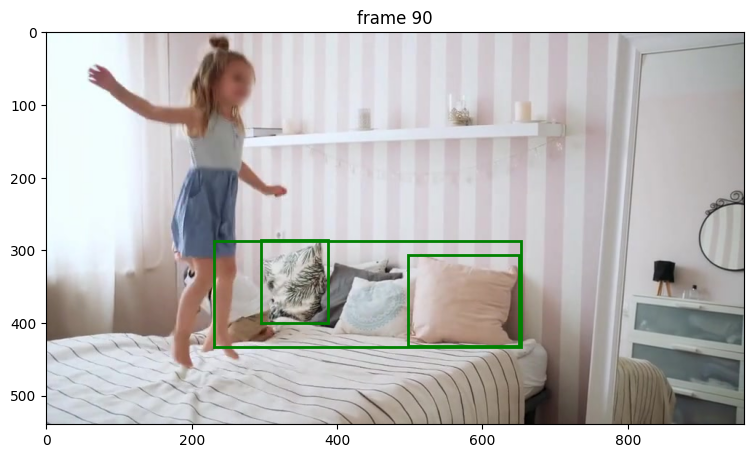

In [9]:
# show the given box
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx_to_run_image_grounding}")
plt.imshow(image_for_grounding)
boxes = grounding_results_text_only["bbox"]
for box in boxes:
    show_box(box, plt.gca())

# Run image grounding - text + box

In [10]:
run_grounding_text_box = False
if run_grounding_text_box:
    grounding_results_text_box = mq_glip_sam2_joint_model.run_image_grounding(
        image_for_grounding, 
        text_prompt="child", 
        box_prompt=[prompt_box], 
        box_prompt_mode="xyxy",
    )
    
    print(f"grounding_results_text_box {grounding_results_text_box}")
    # show the given box
    plt.figure(figsize=(9, 6))
    plt.title(f"frame {frame_idx_to_run_image_grounding}")
    plt.imshow(image_for_grounding)
    boxes = grounding_results_text_box["bbox"]
    for box in boxes:
        show_box(box, plt.gca())

# Run tracking

In [11]:
video_segments = mq_glip_sam2_joint_model.run_sam2_tracking(
    video_frames, 
    grounding_results_text_only, 
    grounding_frame_idx=frame_idx_to_run_image_grounding
)

propagate in video: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:12<00:00,  7.33it/s]


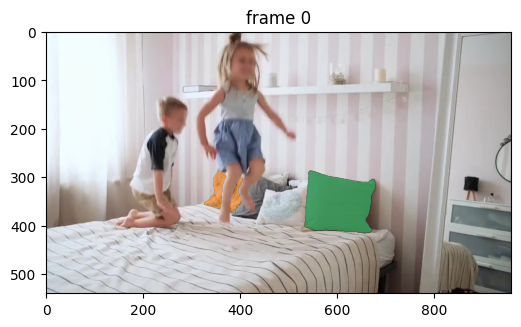

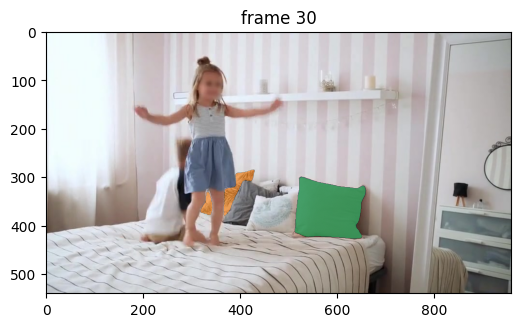

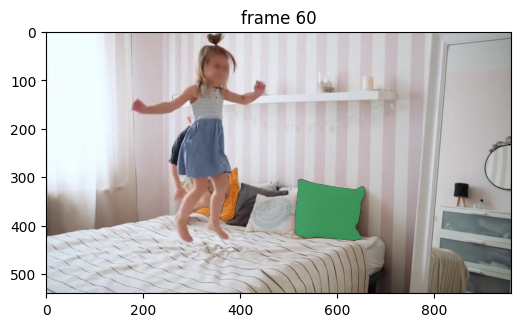

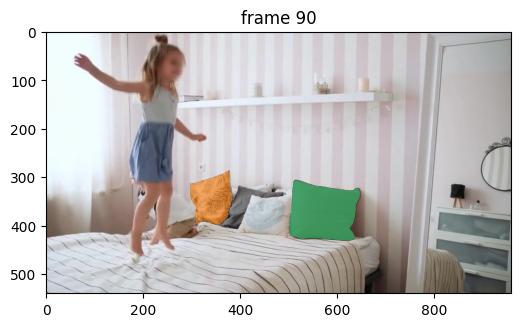

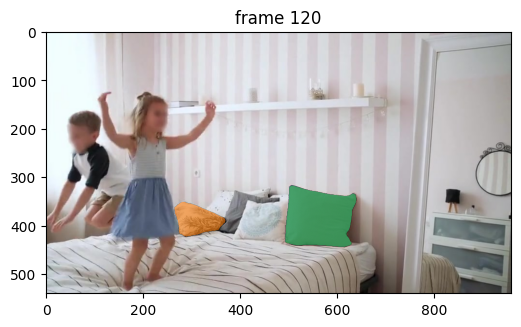

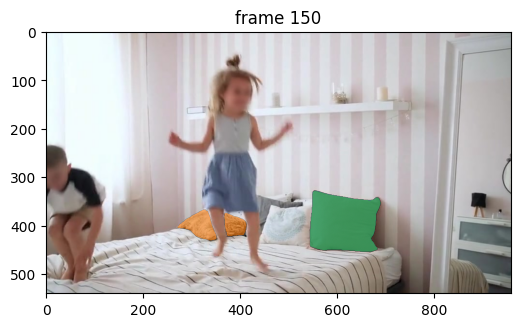

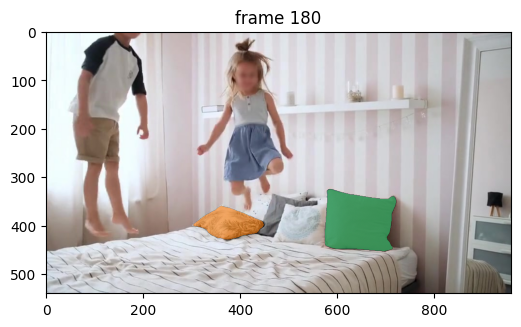

In [12]:
# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(video_frame_paths), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(video_frames[out_frame_idx])
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask.cpu().numpy(), plt.gca(), obj_id=out_obj_id)

# Multiple prompts

In [13]:
multi_prompt_results = mq_glip_sam2_joint_model(
    text_prompt_list = ["child", "pillow"],
    box_prompt_list = None, 
    video_dir_or_loaded_frames = video_frames, 
    frame_idx_to_run_image_grounding = 0,
    box_prompt_mode = "xyxy",
    text_prompt_ids = [12, 666]
)

[[[0, 5]]]
[[[0, 6]]]


propagate in video: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:37<00:00,  5.38it/s]


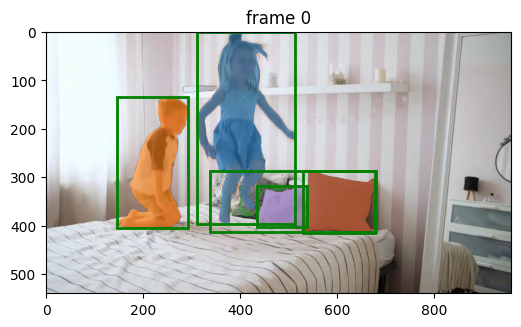

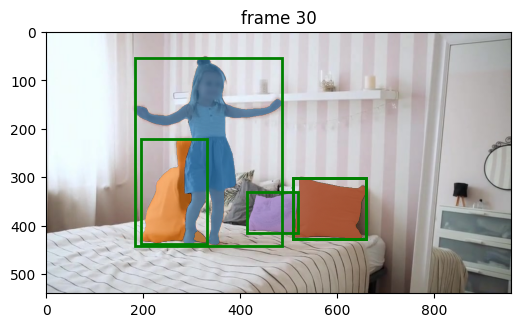

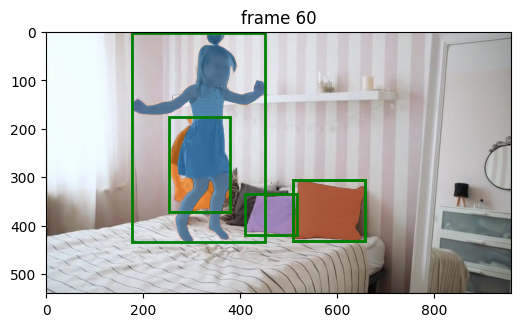

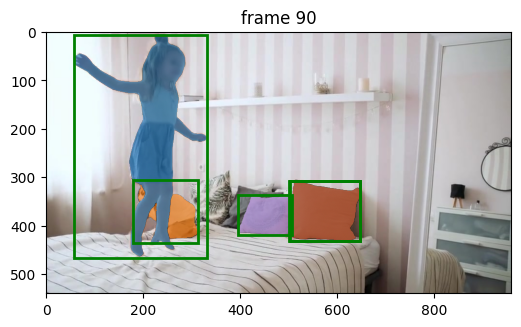

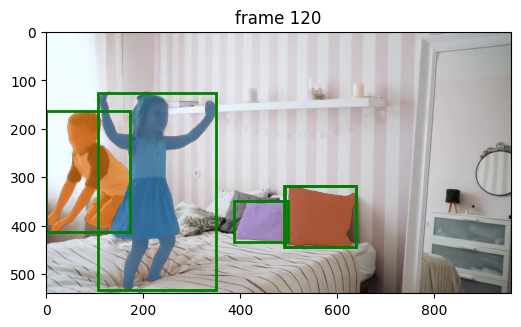

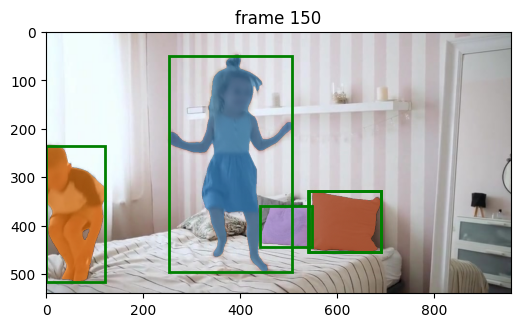

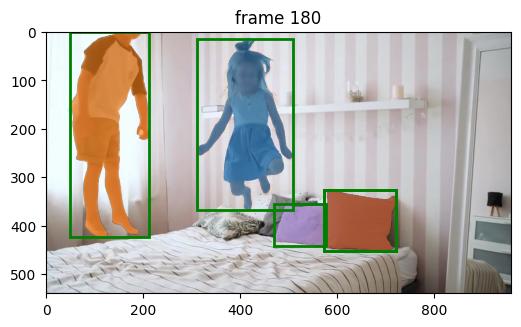

In [22]:
# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
show_box = True
video_segments = multi_prompt_results["tracking_results"]
for out_frame_idx in range(0, len(video_frame_paths), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(video_frames[out_frame_idx])
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask.cpu().numpy(), plt.gca(), obj_id=out_obj_id)
        if show_box:
            box = sam3_eval_preds["boxes"][out_obj_id, out_frame_idx].cpu()
            show_box(box, plt.gca())

In [24]:
# sam3_eval_preds["boxes"][out_obj_id, out_frame_idx].cpu()
sam3_eval_preds["boxes"][:, out_frame_idx].cpu()

tensor([[312,  15, 509, 368],
        [ 49,   0, 211, 423],
        [574, 326, 722, 453],
        [573, 326, 722, 453],
        [470, 355, 578, 441]], dtype=torch.int32)

In [15]:
sam3_eval_preds = mq_glip_sam2_joint_model.prepare_results_in_sam3_eval_format(multi_prompt_results)

In [16]:
for k in ["boxes", "labels", "scores"]:
    print(sam3_eval_preds[k].shape)

torch.Size([5, 200, 4])
torch.Size([5])
torch.Size([5])


In [25]:
sam3_eval_preds["labels"]

tensor([ 12,  12, 666, 666, 666], device='cuda:0')

In [26]:
sam3_eval_preds["scores"]

tensor([0.8333, 0.7893, 0.6373, 0.5402, 0.5017], device='cuda:0')

In [17]:
sam3_eval_preds["boxes"][:, 0]

tensor([[311,   0, 514, 396],
        [146, 135, 292, 405],
        [338, 288, 680, 414],
        [529, 288, 679, 415],
        [434, 317, 539, 402]], device='cuda:0', dtype=torch.int32)

In [20]:
sam3_eval_preds["boxes"][:, 80]

tensor([[187,   8, 340, 480],
        [197, 221, 338, 363],
        [508, 308, 655, 433],
        [507, 308, 655, 433],
        [403, 337, 514, 420]], device='cuda:0', dtype=torch.int32)